https://www.codewars.com/kata/65c9562f4e43b28c4c426c93/train/python
Короткий опис


Опис:
Your task in order to complete this Kata is to write a function which formats a duration, given as a number of seconds, in a human-friendly way.

The function must accept a non-negative integer. If it is zero, it just returns "now". Otherwise, the duration is expressed as a combination of years, days, hours, minutes and seconds.
def format_duration(seconds):

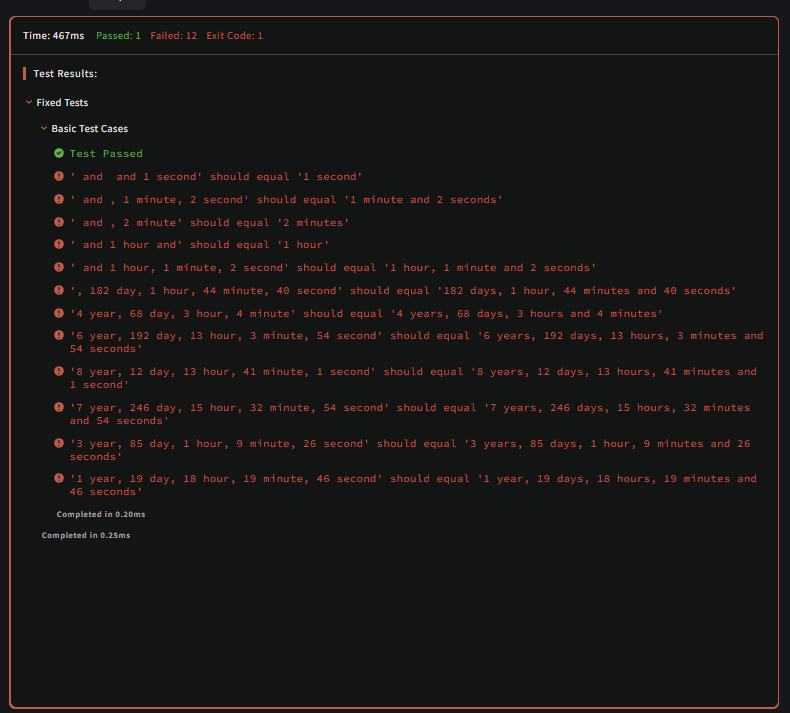

Код ШІ:

In [ ]:
def format_duration(seconds):
    if seconds == 0:
        return "now"

    years, seconds = divmod(seconds, 31536000)
    days, seconds = divmod(seconds, 86400)
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)

    time_units = [('year', years), ('day', days), ('hour', hours), ('minute', minutes), ('second', seconds)]
    time_string = ', '.join(f"{value} {unit}" if value != 0 else '' for unit, value in time_units)

    # handling plurals and formatting
    time_string = time_string.replace(", , ", " and ")
    time_string = time_string.replace(",  ", " ")
    time_string = time_string.rstrip(", ")

    return time_string

Дороблений:
Вцілому ШІ зробив алгоритм розрахунку часу, але у нього виникли проблеми із записом цього у стрічку.
Він створював пустий елемент, якщо одиниця часу була 0, через що на початку речень можна побачити коми. Також він замінював ", , " на " and ", тому можна побачити 'and' на початку речення. Тобто він не написав алгоритм, який записуватиме дані у речення. Я виправила проблему з пустими елементами та дописала алгоритм для запису у речення.

In [ ]:
def format_duration(seconds):
    if seconds == 0:
        return "now"

    years, seconds = divmod(seconds, 31536000)
    days, seconds = divmod(seconds, 86400)
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)

    time_units = [('year', years), ('day', days), ('hour', hours), ('minute', minutes), ('second', seconds)]
    time_string = list(f"{value} {unit}"  for unit, value in time_units if value != 0)
    result = ''
    for ind, word in enumerate(time_string):
        if ind == len(time_string)-1 and ind != 0 and int(word.split(' ')[0]) == 1:
            result += f' and {word}'
        elif ind == len(time_string)-1 and ind != 0 and int(word.split(' ')[0]) > 1:
            result += f' and {word}s'
        elif ind == 0 and int(word.split(' ')[0]) == 1:
            result += f'{word}'
        elif ind == 0 and int(word.split(' ')[0]) > 1:
            result += f'{word}s'
        else:
            if int(word.split(' ')[0]) == 1:
                result += f', {word}'
            else:
                result += f', {word}s'

    # handling plurals and formatting

    return result

Повний опис + тести:
Your task in order to complete this Kata is to write a function which formats a duration, given as a number of seconds, in a human-friendly way.

The function must accept a non-negative integer. If it is zero, it just returns "now". Otherwise, the duration is expressed as a combination of years, days, hours, minutes and seconds.

It is much easier to understand with an example:

* For seconds = 62, your function should return 
    "1 minute and 2 seconds"
* For seconds = 3662, your function should return
    "1 hour, 1 minute and 2 seconds"
For the purpose of this Kata, a year is 365 days and a day is 24 hours.

Note that spaces are important.

Detailed rules
The resulting expression is made of components like 4 seconds, 1 year, etc. In general, a positive integer and one of the valid units of time, separated by a space. The unit of time is used in plural if the integer is greater than 1.

The components are separated by a comma and a space (", "). Except the last component, which is separated by " and ", just like it would be written in English.

A more significant units of time will occur before than a least significant one. Therefore, 1 second and 1 year is not correct, but 1 year and 1 second is.

Different components have different unit of times. So there is not repeated units like in 5 seconds and 1 second.

A component will not appear at all if its value happens to be zero. Hence, 1 minute and 0 seconds is not valid, but it should be just 1 minute.

A unit of time must be used "as much as possible". It means that the function should not return 61 seconds, but 1 minute and 1 second instead. Formally, the duration specified by of a component must not be greater than any valid more significant unit of time.

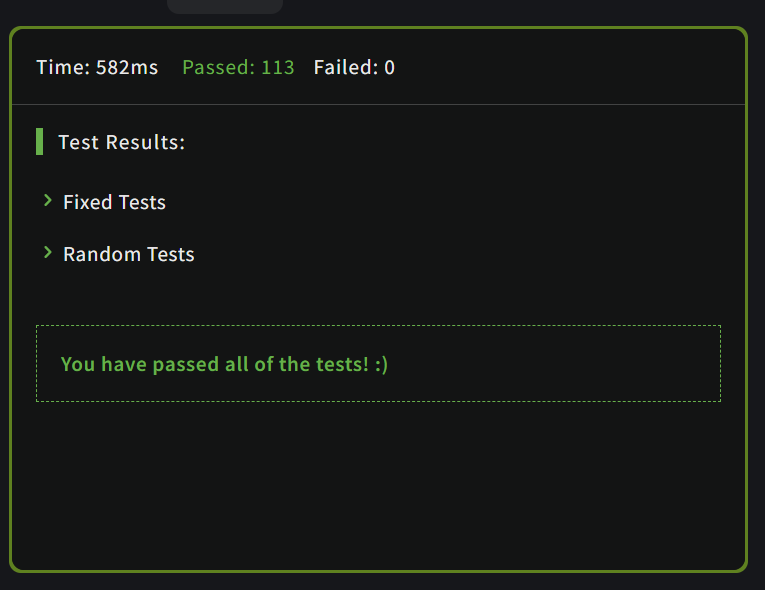

In [ ]:
def format_duration(seconds):
    if seconds == 0:
        return "now"
    
    units = [
        ('year', 365 * 24 * 60 * 60),
        ('day', 24 * 60 * 60),
        ('hour', 60 * 60),
        ('minute', 60),
        ('second', 1)
    ]
    
    result = []
    
    for unit, duration in units:
        if seconds >= duration:
            num_units = seconds // duration
            seconds %= duration
            if num_units > 1:
                result.append(f"{num_units} {unit}s")
            else:
                result.append(f"{num_units} {unit}")
    
    # Joining the result with appropriate separators
    if len(result) > 1:
        return ', '.join(result[:-1]) + f" and {result[-1]}"
    else:
        return result[0]

ШІ чудово справився з задачею, коли йому було надано повний опис і декілька тестів.

https://www.codewars.com/kata/52d1bd3694d26f8d6e0000d3/train/python
Короткий опис:

The Vigenère cipher is a classic cipher originally developed by Italian cryptographer Giovan Battista Bellaso and published in 1553. The cipher is easy to understand and implement, but survived three centuries of attempts to break it, earning it the nickname "le chiffre indéchiffrable" or "the indecipherable cipher." Assume the key is repeated for the length of the text, character by character. Note that some implementations repeat the key over characters only if they are part of the alphabet -- this is not the case here.
class VigenereCipher(object):
    def __init__(self, key, alphabet):
        pass
    
    def encode(self, text):
        pass
    
    def decode(self, text):
        pass

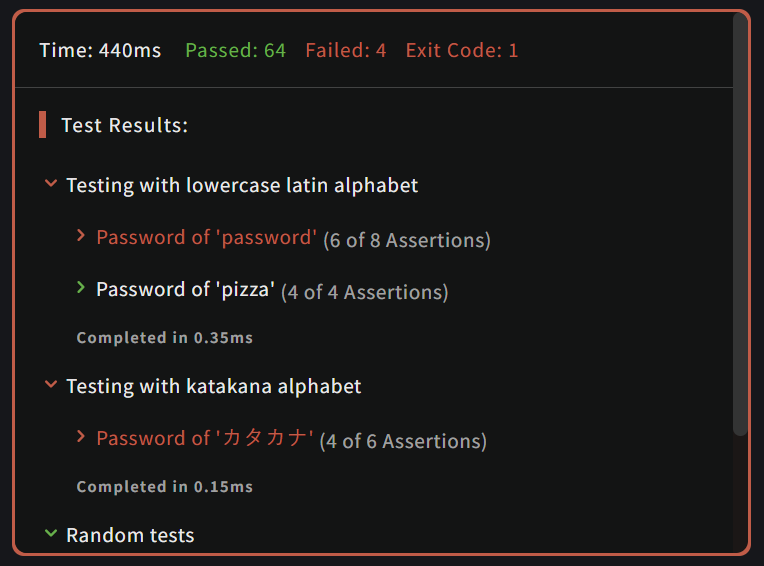

Код ШІ:

In [ ]:
class VigenereCipher(object):
    def __init__(self, key, alphabet):
        self.key = key
        self.alphabet = alphabet
    
    def encode(self, text):
        encoded_text = ''
        key_index = 0

        for char in text:
            if char in self.alphabet:
                shift = self.alphabet.index(self.key[key_index])
                encoded_char = self.alphabet[(self.alphabet.index(char) + shift) % len(self.alphabet)]
                key_index = (key_index + 1) % len(self.key)
            else:
                encoded_char = char
            
            encoded_text += encoded_char
        
        return encoded_text
    
    def decode(self, text):
        decoded_text = ''
        key_index = 0

        for char in text:
            if char in self.alphabet:
                shift = self.alphabet.index(self.key[key_index])
                decoded_char = self.alphabet[(self.alphabet.index(char) - shift) % len(self.alphabet)]
                key_index = (key_index + 1) % len(self.key)
            else:
                decoded_char = char
            
            decoded_text += decoded_char
        
        return decoded_text


Виправлений:
Видалено зайві призначення змінних.
Додано правильну обробку неалфавітних символів.
Налаштовано операцію за модулем для обчислення індексу відповідно до правильного порядку операцій.


In [ ]:
class VigenereCipher(object):
    def __init__(self, key, alphabet):
        self.key = key
        self.alphabet = alphabet

    def encode(self, text):
        encrypted_text = ""
        alphabet_len = len(self.alphabet)
        key_len = len(self.key)

        for i, char in enumerate(text):
            if char in self.alphabet:
                shift = self.alphabet.index(self.key[i % key_len])
                encrypted_char = self.alphabet[(self.alphabet.index(char) + shift) % alphabet_len]
            else:
                encrypted_char = char
            encrypted_text += encrypted_char
        
        return encrypted_text

    def decode(self, text):
        decrypted_text = ""
        alphabet_len = len(self.alphabet)
        key_len = len(self.key)

        for i, char in enumerate(text):
            if char in self.alphabet:
                shift = self.alphabet.index(self.key[i % key_len])
                decrypted_char = self.alphabet[(self.alphabet.index(char) - shift) % alphabet_len]
            else:
                decrypted_char = char
            decrypted_text += decrypted_char
        
        return decrypted_text

Повний опис + тести:
The Vigenère cipher is a classic cipher originally developed by Italian cryptographer Giovan Battista Bellaso and published in 1553. It is named after a later French cryptographer Blaise de Vigenère, who had developed a stronger autokey cipher (a cipher that incorporates the message of the text into the key).

The cipher is easy to understand and implement, but survived three centuries of attempts to break it, earning it the nickname "le chiffre indéchiffrable" or "the indecipherable cipher."

From Wikipedia:

The Vigenère cipher is a method of encrypting alphabetic text by using a series of different Caesar ciphers based on the letters of a keyword. It is a simple form of polyalphabetic substitution.

. . .

In a Caesar cipher, each letter of the alphabet is shifted along some number of places; for example, in a Caesar cipher of shift 3, A would become D, B would become E, Y would become B and so on. The Vigenère cipher consists of several Caesar ciphers in sequence with different shift values.

Assume the key is repeated for the length of the text, character by character. Note that some implementations repeat the key over characters only if they are part of the alphabet -- this is not the case here.

The shift is derived by applying a Caesar shift to a character with the corresponding index of the key in the alphabet.

Visual representation:

"my secret code i want to secure"  // message
"passwordpasswordpasswordpasswor"  // key
Write a class that, when given a key and an alphabet, can be used to encode and decode from the cipher.

Example
var alphabet = 'abcdefghijklmnopqrstuvwxyz';
var key = 'password';

// creates a cipher helper with each letter substituted
// by the corresponding character in the key
var c = new VigenèreCipher(key, alphabet);

c.encode('codewars'); // returns 'rovwsoiv'
c.decode('laxxhsj');  // returns 'waffles'
Any character not in the alphabet must be left as is. For example (following from above):

c.encode('CODEWARS'); // returns 'CODEWARS'
class VigenereCipher(object):
    def __init__(self, key, alphabet):
        pass
    
    def encode(self, text):
        pass
    
    def decode(self, text):
        pass

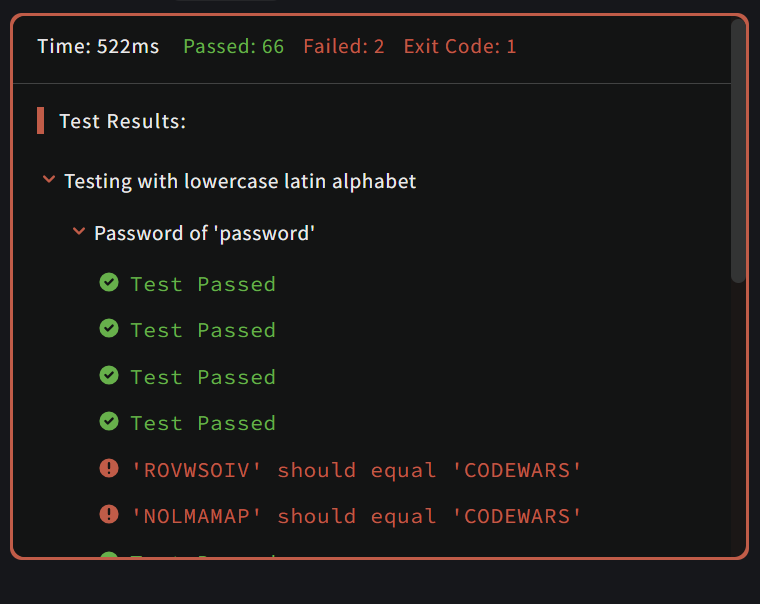

Написаний ШІ:

In [ ]:
class VigenereCipher:
    def __init__(self, key, alphabet):
        self.key = key
        self.alphabet = alphabet

    def encode(self, text):
        encoded_text = ''
        key_length = len(self.key)
        for i, char in enumerate(text):
            if char.lower() in self.alphabet:
                shift = self.alphabet.index(self.key[i % key_length].lower())
                encoded_char = self.shift_char(char, shift)
                encoded_text += encoded_char
            else:
                encoded_text += char
        return encoded_text

    def decode(self, text):
        decoded_text = ''
        key_length = len(self.key)
        for i, char in enumerate(text):
            if char.lower() in self.alphabet:
                shift = self.alphabet.index(self.key[i % key_length].lower())
                decoded_char = self.shift_char(char, -shift)
                decoded_text += decoded_char
            else:
                decoded_text += char
        return decoded_text

    def shift_char(self, char, shift):
        char_index = self.alphabet.index(char.lower())
        shifted_index = (char_index + shift) % len(self.alphabet)
        shifted_char = self.alphabet[shifted_index]
        if char.isupper():
            return shifted_char.upper()
        else:
            return shifted_char

Виправлений:
Алгоритм правильний, але якщо літера була великою в малому регістрі, то її повертало переробленою великою, а мало б лишати її такою, як вона є.

In [ ]:
class VigenereCipher:
    def __init__(self, key, alphabet):
        self.key = key
        self.alphabet = alphabet

    def encode(self, text):
        encoded_text = ''
        key_length = len(self.key)
        for i, char in enumerate(text):
            if char.lower() in self.alphabet:
                shift = self.alphabet.index(self.key[i % key_length].lower())
                encoded_char = self.shift_char(char, shift)
                encoded_text += encoded_char
            else:
                encoded_text += char
        return encoded_text

    def decode(self, text):
        decoded_text = ''
        key_length = len(self.key)
        for i, char in enumerate(text):
            if char.lower() in self.alphabet:
                shift = self.alphabet.index(self.key[i % key_length].lower())
                decoded_char = self.shift_char(char, -shift)
                decoded_text += decoded_char
            else:
                decoded_text += char
        return decoded_text

    def shift_char(self, char, shift):
        char_index = self.alphabet.index(char.lower())
        shifted_index = (char_index + shift) % len(self.alphabet)
        shifted_char = self.alphabet[shifted_index]
        if char.isupper():
            return char
        else:
            return shifted_char